# General data reader for AQUA 
## Example of datasets on Lumi

We added a few new data sources to the intake catalogue, pointing to resources already available on LUMI.

### Inspecting available datasets

Multiple datasets area available also for observations, so that we can also inspect the catalogue by checking what is inside. This can be done with the `inspect_catalogue` function

In [1]:
from aqua import catalogue, inspect_catalogue
from aqua import Reader
cat = catalogue()

FESOM	test-pi	5km experiment, coupuled with IFS
	- elem_grid	
	- node_grid	
	- original_2d	original 2d output
	- original_3d	original 3d output

IFS	test-tco79	5km experiment, coupuled with IFS
	- original_2d	original 2d output
IFS	tco79-eORCA1	tco79-eORCA1 data
	- atm2d	
	- atm3d	

NEMO	tco79-eORCA1	tco79-eORCA1 data
	- fdb_nomagician	



Here below a short exploration at cataogue, model and experiment level

In [3]:
inspect_catalogue(cat)

Models available in catalogue:


['FESOM', 'IFS', 'NEMO']

In [2]:
inspect_catalogue(cat, model = 'IFS')

Experiments available in catalogue for model IFS:


['test-tco79', 'tco79-eORCA1']

In [4]:
inspect_catalogue(cat, model = 'IFS', exp = 'tco79-eORCA1')

Sources available in catalogue for model IFS and exp tco79-eORCA1:


['atm2d', 'atm3d']

### IFS data

In [18]:
reader = Reader(model="IFS", exp="tco79-eORCA1", source="atm2d", loglevel='INFO', regrid='r020')

2023-06-07 16:00:16 :: Reader :: WARNING  -> Source grid: /pfs/lustrep3/scratch/project_465000454/AQUA-workflow/tco_grids/tco79_grid.nc
2023-06-07 16:00:16 :: Reader :: WARNING  -> Weights file not found: /pfs/lustrep3/projappl/project_465000454/padavini/aqua/weights/weights_IFS_tco79-eORCA1_atm2d_ycon_r020_l2d.nc
2023-06-07 16:00:16 :: Reader :: WARNING  -> Attempting to generate it ...
2023-06-07 16:00:44 :: Reader :: WARNING  -> Success!
2023-06-07 16:00:44 :: Reader :: WARNING  -> Destination areas file not found: /pfs/lustrep3/projappl/project_465000454/padavini/aqua/areas/cell_area_r020.nc
2023-06-07 16:00:44 :: Reader :: WARNING  -> Attempting to generate it ...
2023-06-07 16:01:33 :: Reader :: WARNING  -> Success!


In [24]:
data = reader.retrieve()
data

2023-06-07 16:04:44 :: Reader :: INFO     -> tprate: m --> m s**-1
2023-06-07 16:04:44 :: Reader :: INFO     -> tprate: corrected dividing by accumulation time 3600 s
2023-06-07 16:04:44 :: Reader :: INFO     -> Fixing tp to tprate. Unit fix: factor=0.000278, offset=0.000000
2023-06-07 16:04:44 :: Reader :: INFO     -> Grib attributes for cprate: {'paramId': '172143', 'long_name': 'Mean convective precipitation rate', 'units': 'm s**-1', 'cfVarName': 'cprate', 'shortName': 'cprate'}
2023-06-07 16:04:44 :: Reader :: INFO     -> var172143: m --> m s**-1
2023-06-07 16:04:44 :: Reader :: INFO     -> var172143: corrected dividing by accumulation time 3600 s
2023-06-07 16:04:44 :: Reader :: INFO     -> Fixing cp to var172143. Unit fix: factor=0.000278, offset=0.000000
2023-06-07 16:04:44 :: Reader :: INFO     -> mlsprt: m --> m s**-1
2023-06-07 16:04:44 :: Reader :: INFO     -> mlsprt: corrected dividing by accumulation time 3600 s
2023-06-07 16:04:44 :: Reader :: INFO     -> Fixing lsp to m

<xarray.Dataset>
Dimensions:    (time: 8305, value: 28480, level: 2)
Coordinates:
    lat        (value) float64 dask.array<chunksize=(28480,), meta=np.ndarray>
  * level      (level) int64 0 1
    lon        (value) float64 dask.array<chunksize=(28480,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2020-01-20 ... 2020-12-31
Dimensions without coordinates: value
Data variables: (12/87)
    100si      (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    100u       (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    100v       (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    10u        (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    10v        (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    2d         (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    ...         ...
    vike       (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    vipie      (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    vipile     (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    vithe      (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    z          (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
    zos        (time, value) float64 dask.array<chunksize=(1, 28480), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

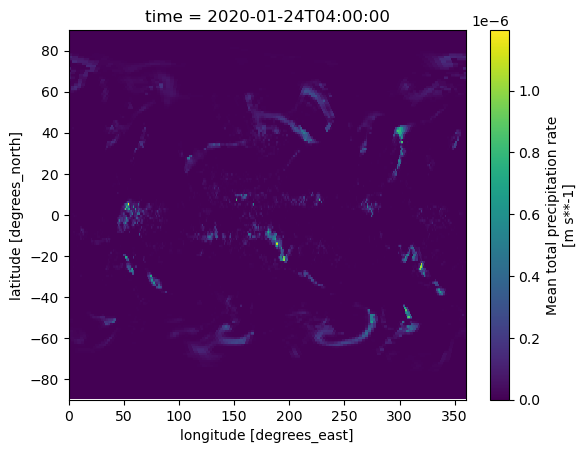

In [28]:
infile = data['tprate'].isel(time=100)
infile = reader.regrid(infile)
infile.plot()

In [29]:
reader = Reader(model="IFS", exp="tco79-eORCA1", source="atm3d", loglevel='INFO', regrid='r100')

2023-06-07 16:06:23 :: Reader :: WARNING  -> Source grid: /pfs/lustrep3/scratch/project_465000454/AQUA-workflow/tco_grids/tco79_grid.nc
2023-06-07 16:06:23 :: Reader :: WARNING  -> Weights file not found: /pfs/lustrep3/projappl/project_465000454/padavini/aqua/weights/weights_IFS_tco79-eORCA1_atm3d_ycon_r100_l2d.nc
2023-06-07 16:06:23 :: Reader :: WARNING  -> Attempting to generate it ...
2023-06-07 16:06:28 :: Reader :: WARNING  -> Success!
2023-06-07 16:06:28 :: Reader :: WARNING  -> Source grid: /pfs/lustrep3/scratch/project_465000454/AQUA-workflow/tco_grids/tco79_grid.nc
2023-06-07 16:06:28 :: Reader :: WARNING  -> Source areas file not found: /pfs/lustrep3/projappl/project_465000454/padavini/aqua/areas/cell_area_IFS_tco79-eORCA1_atm3d.nc
2023-06-07 16:06:28 :: Reader :: WARNING  -> Attempting to generate it ...
2023-06-07 16:06:30 :: Reader :: WARNING  -> Success!


In [31]:
data = reader.retrieve()
data

2023-06-07 16:06:46 :: Reader :: INFO     -> Grib attributes for cprate: {'paramId': '172143', 'long_name': 'Mean convective precipitation rate', 'units': 'm s**-1', 'cfVarName': 'cprate', 'shortName': 'cprate'}
2023-06-07 16:06:46 :: Reader :: INFO     -> Data model: ../../config/data_models/ifs2cds.json


<xarray.Dataset>
Dimensions:  (time: 1385, plev: 23, value: 28480)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(28480,), meta=np.ndarray>
  * plev     (plev) float64 1e+05 9.75e+04 9.5e+04 ... 3e+03 1e+03 100.0
    lon      (value) float64 dask.array<chunksize=(28480,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T06:00:00 ... 2020-12-31
Dimensions without coordinates: value
Data variables: (12/15)
    cc       (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    ciwc     (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    clwc     (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    crwc     (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    cswc     (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    d        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    ...       ...
    u        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    v        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    vo       (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    w        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    z        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
    ~        (time, plev, value) float64 dask.array<chunksize=(1, 1, 28480), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

## NEMO access (experimental)

There is an experimantal source available at the moment on lumi:

In [3]:
reader = Reader(model='NEMO', exp='tco79-eORCA1', source='fdb_nomagician',areas=False,loglevel='INFO')

2023-06-07 15:52:33 :: Reader :: WARNING  -> No fixes available for model NEMO


In [4]:
data = reader.retrieve(fix=False)

In [5]:
data

<xarray.Dataset>
Dimensions:      (time: 5927, cell: 120184, level: 75)
Coordinates:
  * level        (level) int64 1 2 3 4 5 6 7 8 9 ... 67 68 69 70 71 72 73 74 75
  * time         (time) datetime64[ns] 2020-01-20T02:00:00 ... 2020-09-23
Dimensions without coordinates: cell
Data variables: (12/18)
    avg_hc300m   (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    avg_hc700m   (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    avg_siconc   (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    avg_sithick  (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    avg_sos      (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    avg_tos      (time, cell) float64 dask.array<chunksize=(1, 120184), meta=np.ndarray>
    ...           ...
    ulat         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
    ulon         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
    vlat         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
    vlon         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
    wlat         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
    wlon         (cell) float64 dask.array<chunksize=(120184,), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          255
    uuidOfHGrid:        16076978-a048-4107-47dd-7c9876677b28
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.Ma...

`areas=True` still not working but data are available (notice in the plot below that value are not the one expected because NaN values are not what expected in the data description):

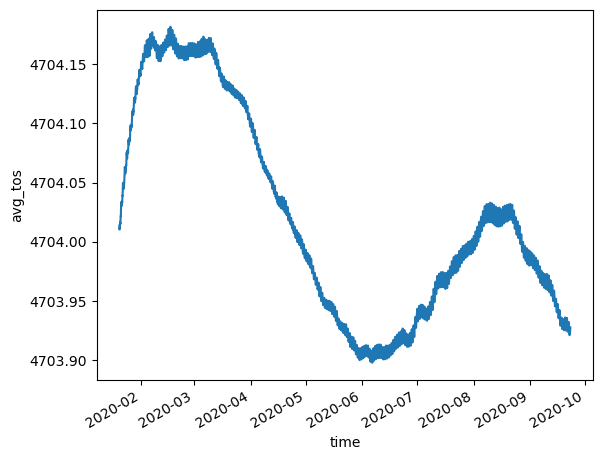

In [10]:
data.avg_tos.mean(dim='cell').plot()